In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=load_iris()
dataset_name=['sepal_length','sepal_width','petal_length', 'petal_width']
target_name=['setosa', 'versicolor', 'virginica']

In [3]:
dataset.data
dataset.target
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
data=pd.DataFrame(data=dataset.data,columns=dataset_name)

In [5]:
data['target']=dataset.target

In [6]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [8]:
for col in data.columns:
    print(data[col].value_counts().sum())

150
150
150
150
150


In [9]:
for col in data.columns:
    print(data[col].isnull().sum())

0
0
0
0
0


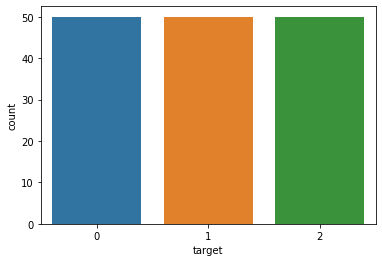

In [10]:
import seaborn as sns
sns.countplot(x=data.target)

## Pure Balanced Data So No Problem For Overfit

In [11]:
#plitting Data into train And test Model
X=data.iloc[:,data.columns!='target']
y=data.target
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.25,random_state=0)

In [12]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=0)
abc=abc.fit(train_x,train_y)
y_test_abc=abc.predict(test_x)
y_train_abc=abc.predict(train_x)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification
print('Accuracy of Test is : ',accuracy_score(test_y,y_test_abc))
print('Accuracy of Train is : ',accuracy_score(train_y,y_train_abc))

Accuracy of Test is :  0.8947368421052632
Accuracy of Train is :  0.9642857142857143


In [22]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',probability=True)
abc_sv=AdaBoostClassifier(n_estimators=50,base_estimator=svc,learning_rate=1,random_state=0)
abc_sv=abc_sv.fit(train_x,train_y)

In [23]:
y_test_abc_sv=abc_sv.predict(test_x)
y_train_abc_sv=abc_sv.predict(train_x)

In [24]:
print('Accuracy of Test is : ',accuracy_score(test_y,y_test_abc_sv))
print('Accuracy of Train is : ',accuracy_score(train_y,y_train_abc_sv))

Accuracy of Test is :  0.9736842105263158
Accuracy of Train is :  0.9821428571428571


In [25]:
from sklearn.linear_model import LogisticRegression
lgc=LogisticRegression()
abc_lgc=AdaBoostClassifier(n_estimators=50,base_estimator=lgc,learning_rate=0.2,random_state=0)
abc_lgc=abc_lgc.fit(train_x,train_y)
y_test_abc=abc_lgc.predict(test_x)
y_train_abc=abc_lgc.predict(train_x)
print('Accuracy of Test is : ',accuracy_score(test_y,y_test_abc))
print('Accuracy of Train is : ',accuracy_score(train_y,y_train_abc))

Accuracy of Test is :  0.8947368421052632
Accuracy of Train is :  0.8928571428571429


## As You See First Our Adaboost Model was Little Ovefit To Training
###### Accuracy of Test is :  0.8947368421052632
###### Accuracy of Train is :  0.9642857142857143
## But After We Use base_estimator='svc' with kernel='linear' Now Our Model Is Perfect
###### Accuracy of Test is :  0.9736842105263158
###### Accuracy of Train is :  0.9821428571428571